<a href="https://colab.research.google.com/github/ismahaniy/introdatascience/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/u2101477/ML/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
import warnings
warnings.filterwarnings('ignore')

mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

print(df['bmi'].isnull().sum())

df['bmi']

0


0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
df_encoded = df_encoded.drop('gender_Other', axis=1)
df_encoded

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [ ]:
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

         id       age  hypertension  heart_disease  avg_glucose_level  \
3378  62090  0.343796             0              0           2.496124   
479   15649  0.476478             1              0           2.043819   
3683  27647  1.626390             0              1          -0.235377   
2997   4498  1.228344             0              1           2.182735   
286   36811 -0.894570             0              0          -0.266297   
...     ...       ...           ...            ...                ...   
4426  13846 -0.010023             0              0          -0.400796   
466    1307  0.786070             1              0           1.411298   
3092  31481 -1.860496             0              0          -0.195845   
3772  61827  1.626390             0              0           1.986176   
860   28933  0.122660             0              0          -0.132460   

               bmi  gender_Female  gender_Male  ever_married_No  \
3378  1.178033e-01              0            1          

In [ ]:
#@title Default title text
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[ 1.22233477  0.34409267 -0.31444619 ... -0.46427791  1.29634146
  -0.42562827]
 [-0.98310938  0.47738294  3.18019439 ... -0.46427791 -0.7714017
   2.34946802]
 [-0.41333442  1.63256526 -0.31444619 ... -0.46427791 -0.7714017
  -0.42562827]
 ...
 [-0.23126098 -1.87030297 -0.31444619 ... -0.46427791 -0.7714017
  -0.42562827]
 [ 1.20984512  1.63256526 -0.31444619 ...  2.15388236 -0.7714017
  -0.42562827]
 [-0.35226336  0.12194223 -0.31444619 ... -0.46427791 -0.7714017
   2.34946802]]
[[ 0.17524624 -0.54450911 -0.31444619 ... -0.46427791 -0.7714017
  -0.42562827]
 [ 0.89722397 -0.14463831 -0.31444619 ... -0.46427791  1.29634146
  -0.42562827]
 [ 1.64508328 -1.56640116 -0.31444619 ... -0.46427791 -0.7714017
  -0.42562827]
 ...
 [ 0.63940531 -1.16653036 -0.31444619 ... -0.46427791  1.29634146
  -0.42562827]
 [ 1.18481833 -1.03324009 -0.31444619 ... -0.46427791  1.29634146
  -0.42562827]
 [-1.43173949 -1.74412152 -0.31444619 ... -0.46427791 -0.7714017
  -0.42562827]]


In [ ]:
train_data = X_train.join(y_train)
train_data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
3378,62090,0.343796,0,0,2.496124,1.178033e-01,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
479,15649,0.476478,1,0,2.043819,4.615554e-16,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
3683,27647,1.626390,0,1,-0.235377,3.516526e-01,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
2997,4498,1.228344,0,1,2.182735,4.615554e-16,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
286,36811,-0.894570,0,0,-0.266297,2.607112e-01,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,-0.010023,0,0,-0.400796,2.217363e-01,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
466,1307,0.786070,1,0,1.411298,4.067258e+00,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3092,31481,-1.860496,0,0,-0.195845,-1.441192e+00,1,0,1,0,...,0,0,1,0,1,1,0,0,0,0
3772,61827,1.626390,0,0,1.986176,2.737028e-01,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'gender_Female'}>,
        <Axes: title={'center': 'gender_Male'}>,
        <Axes: title={'center': 'ever_married_No'}>,
        <Axes: title={'center': 'ever_married_Yes'}>],
       [<Axes: title={'center': 'work_type_Govt_job'}>,
        <Axes: title={'center': 'work_type_Never_worked'}>,
        <Axes: title={'center': 'work_type_Private'}>,
        <Axes: title={'center': 'work_type_Self-employed'}>,
        <Axes: title={'center': 'work_type_children'}>],
       [<Axes: title={'center': 'Residence_type_Rural'}>,
        <Axes: title={'center': 'Residence_type_Urban'}>,
        <Axes: title={'center': 'smoking_status_Unknown'}>,
        <Axes: title={'center': 'smoking_status_formerly

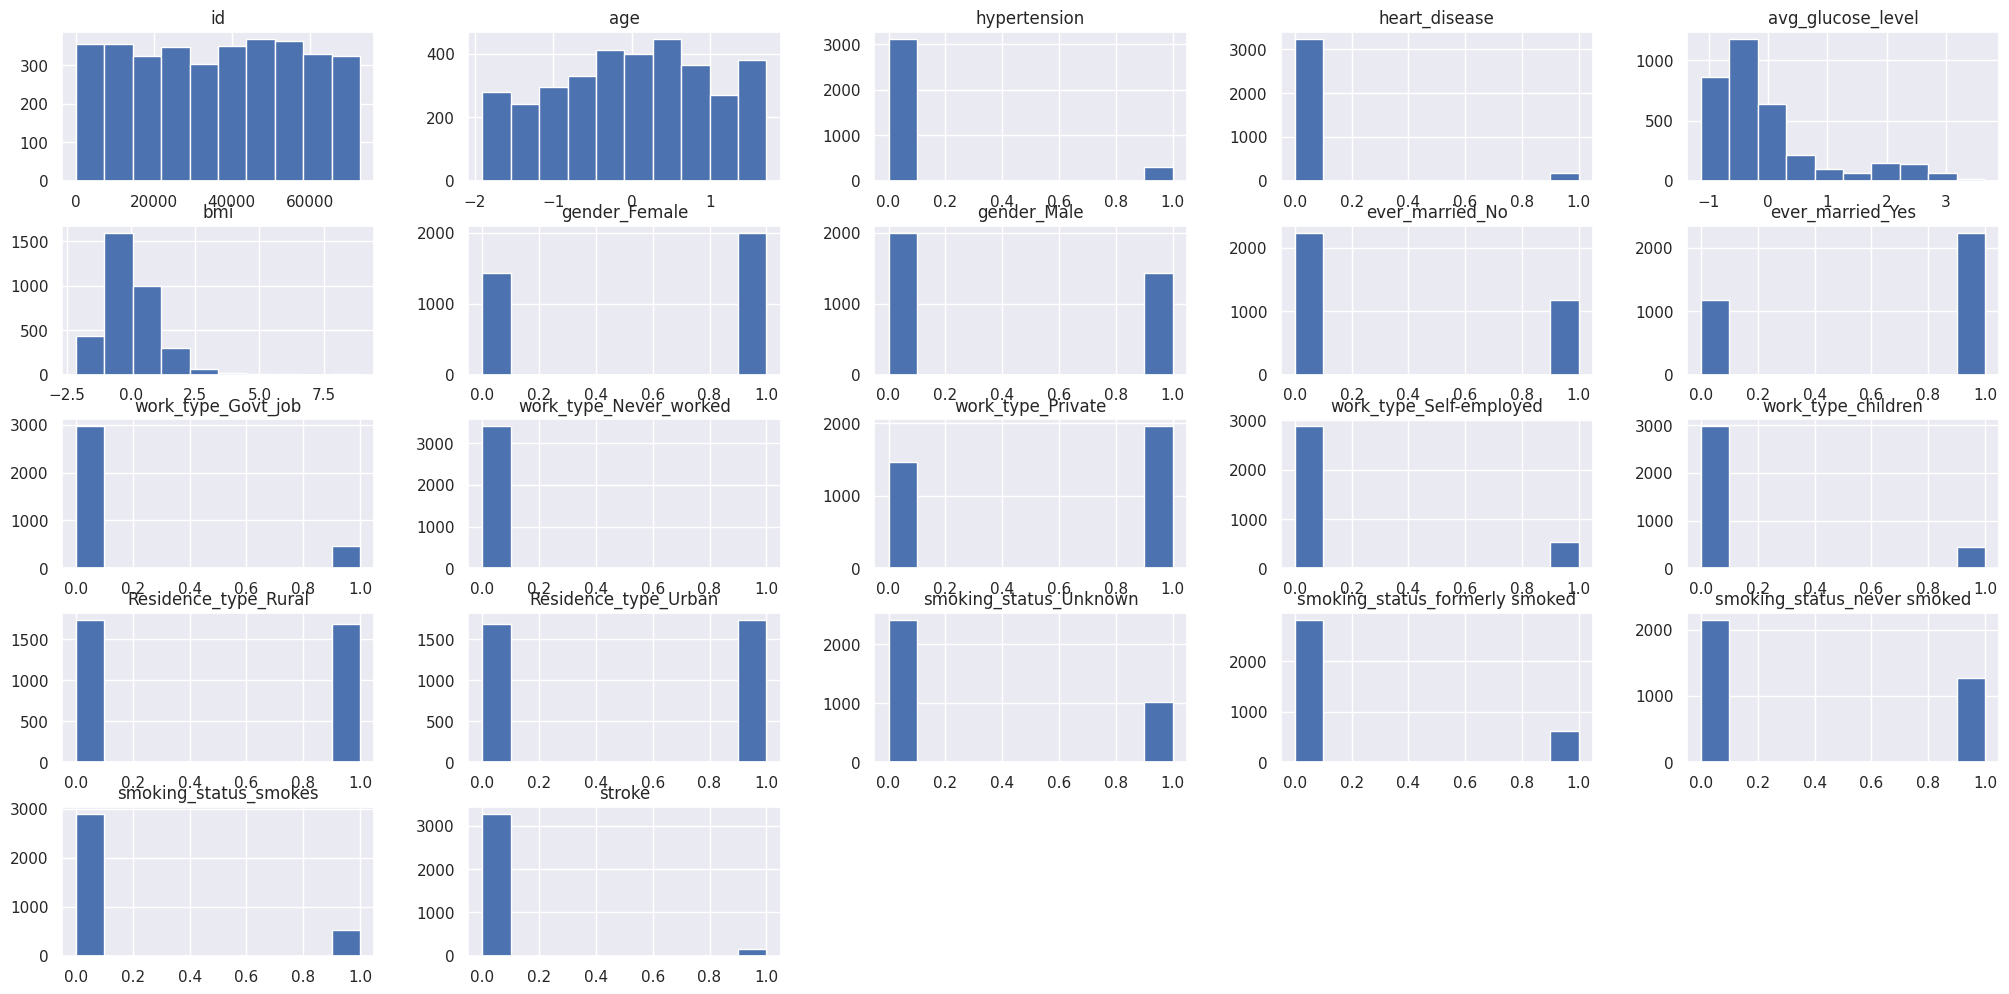

In [ ]:
train_data.hist(figsize=(25,12))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.pie=pd.DataFrame(train_data.groupby('stroke')['stroke'].count())
plt.pie

,stroke
stroke,
0,3270
1,153


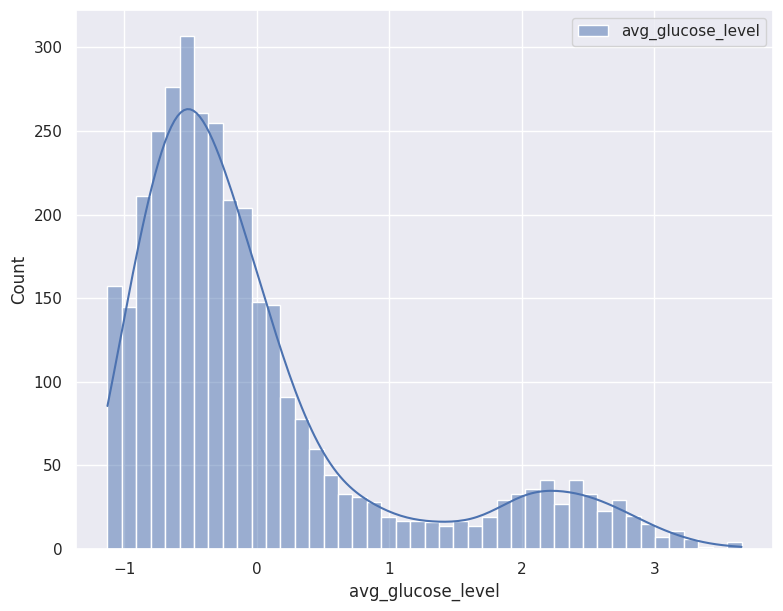

In [ ]:
sns.set_theme(style = "darkgrid")
fig = plt.figure(figsize = (9,7))
sns.histplot(train_data['avg_glucose_level'],label = "avg_glucose_level", kde = True)
plt.legend()

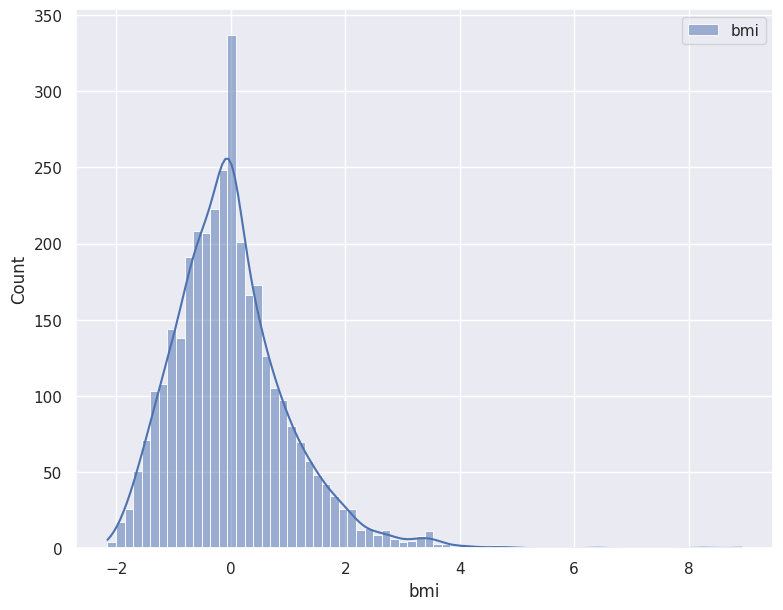

In [ ]:
fig = plt.figure(figsize = (9,7))
sns.histplot(train_data['bmi'],label = "bmi", kde = True)
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

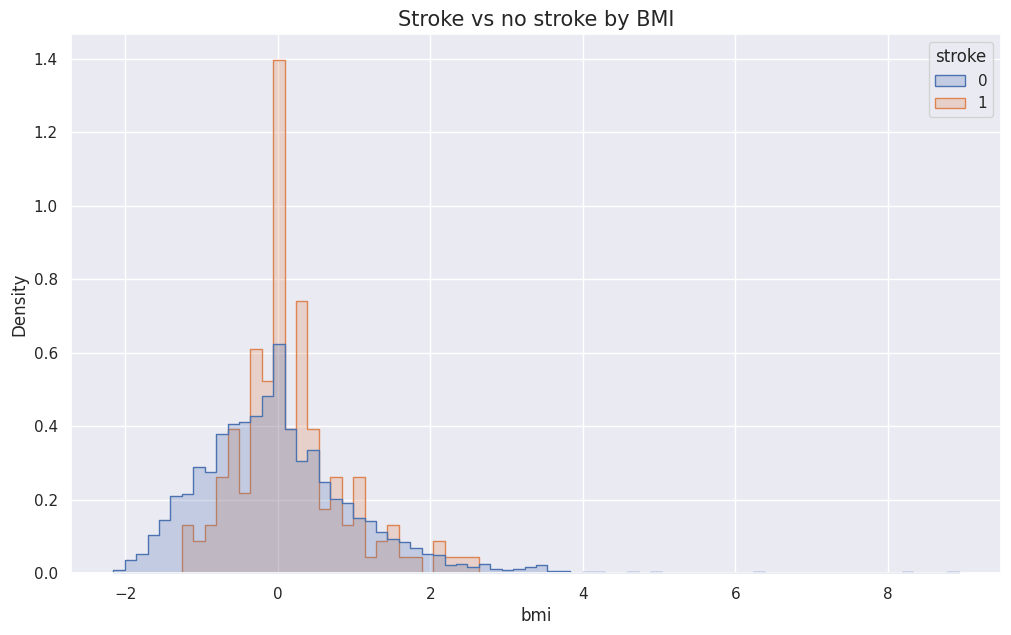

In [ ]:
fig = plt.figure(figsize = (12,7))
sns.histplot(train_data, x = "bmi", hue = "stroke", element = "step", stat = "density", common_norm = False)
plt.title('Stroke vs no stroke by BMI', fontsize = 15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

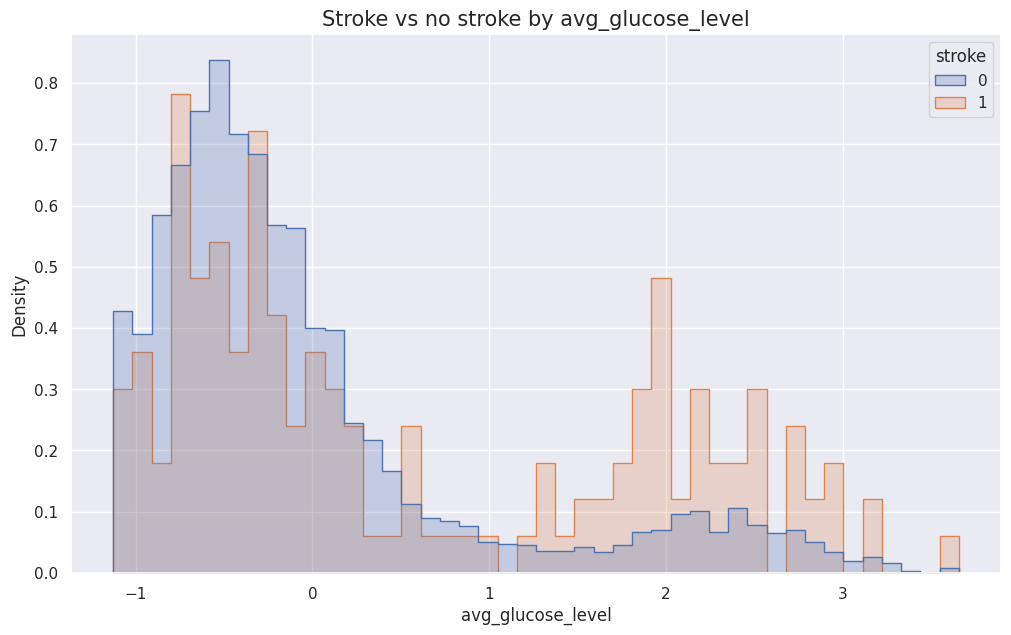

In [ ]:
fig = plt.figure(figsize = (12,7))
sns.histplot(train_data, x = "avg_glucose_level", hue = "stroke", element = "step", stat = "density", common_norm = False)
plt.title('Stroke vs no stroke by avg_glucose_level', fontsize = 15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

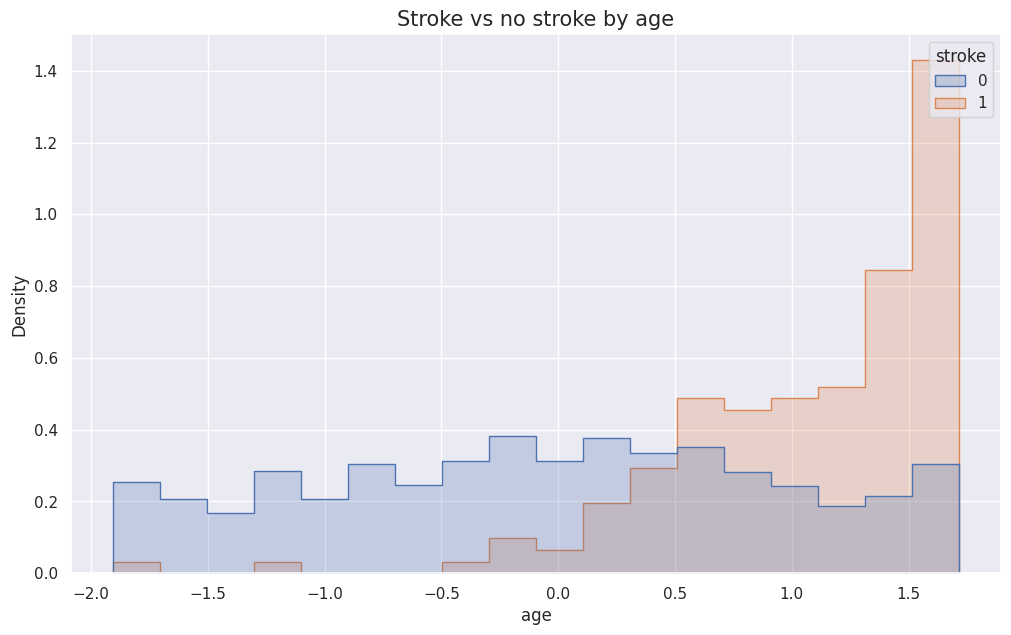

In [ ]:
fig = plt.figure(figsize = (12,7))
sns.histplot(train_data, x = "age", hue = "stroke", element = "step", stat = "density", common_norm = False)
plt.title('Stroke vs no stroke by age', fontsize = 15)
plt.show

<Axes: >

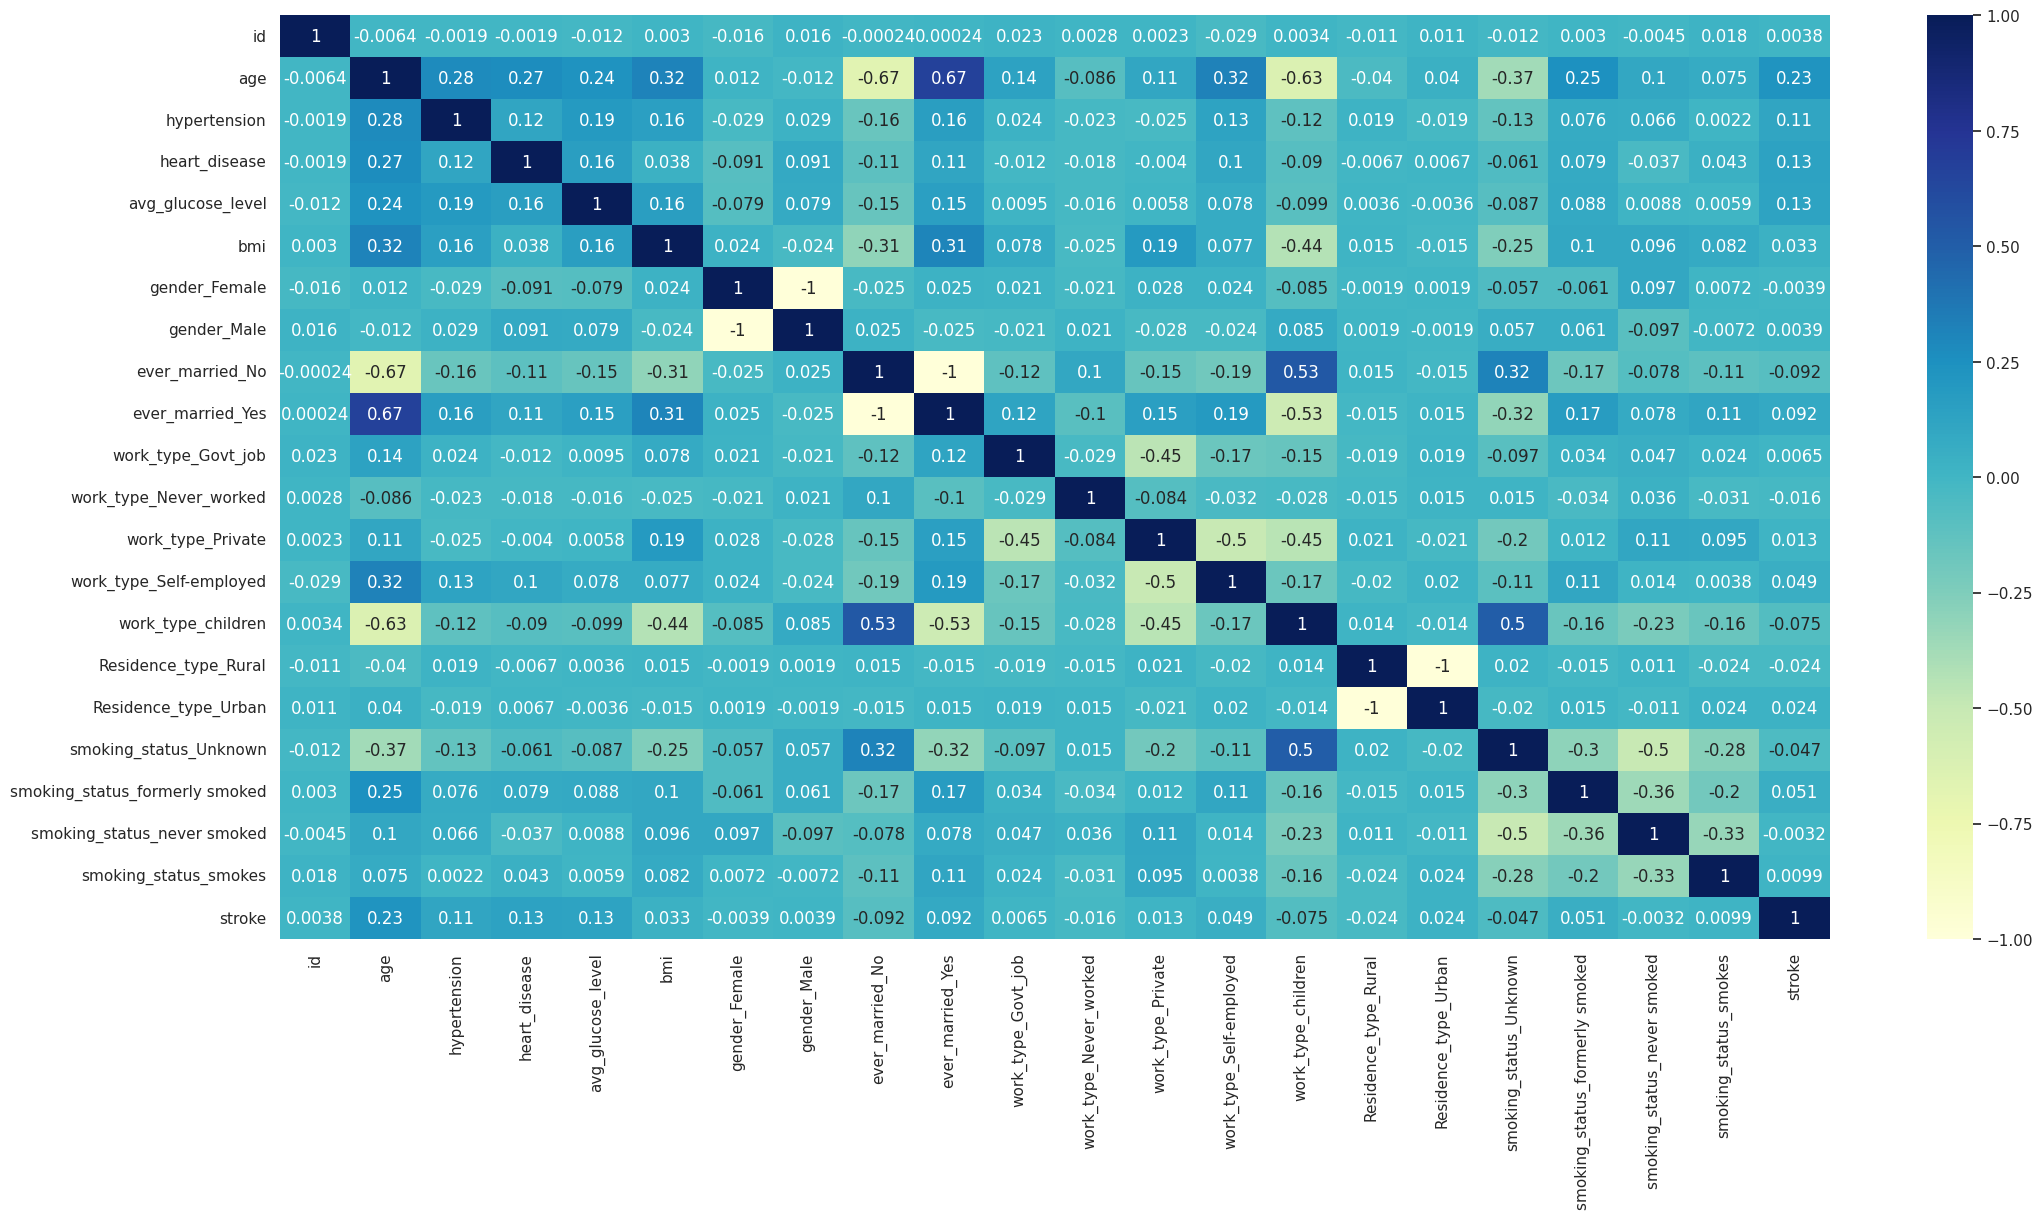

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(train_data.corr(), annot = True, cmap ="YlGnBu")

In [ ]:
X = df.drop('Resident_type' )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=1)
decision.fit(X_train_scaled,y_train)
decision.score(X_test_scaled,y_test)

0.9057498518079431

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf.score(X_test_scaled,y_test)

0.943687018375815

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.943094250148192

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(X_train_scaled,y_train)
kc.score(X_test_scaled,y_test)

0.943094250148192

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)
lg.score(X_test_scaled,y_test)

0.943687018375815

In [ ]:
y_pred =lg.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1-Score:",f1)
print("ROC AUC Score:",roc_auc)

Accuracy: 0.943687018375815
Precision: 1.0
Recall: 0.010416666666666666
F1-Score: 0.020618556701030924
ROC AUC Score: 0.5052083333333334


In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
url = 'https://raw.githubusercontent.com/u2101477/ML/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

In [ ]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded = df_encoded.drop('gender_Other', axis=1)

In [ ]:
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = df_encoded[numeric_cols].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
y = df_encoded['stroke'].values

In [ ]:
model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
!python app.py